## ESMA 3016
## Edgar Acuna
### Graficas en Python usando cuatro librerias: ggplot, plotly, seaborn y bokeh (Python 2)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from ggplot import mtcars
import bokeh

C:\Users\edgar2017\Anaconda2\envs\ipykernel_py2\lib\site-packages\ggplot\utils.py:66: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\edgar2017\Anaconda2\envs\ipykernel_py2\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\edgar2017\Anaconda2\envs\ipykernel_py2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#llamando a plotnine
import plotnine

In [3]:
# Otra forma de llamar a plotnine
from plotnine import *

In [4]:
#Funcion magica para que la grafica de matplotlib salga en la pantalla
%matplotlib inline

In [5]:
#Leyendo los datos
datos1=pd.read_csv("http://academic.uprm.edu/eacuna/clase97.txt",sep=" ")

In [6]:
datos1.head()

,edad,sexo,escuela,programa,creditos,gpa,familia,hestud,htv
0,21,f,publ,biol,119,3.60,3,35,10
1,18,f,priv,mbio,15,3.60,3,30,10
2,19,f,priv,biot,73,3.61,5,5,7
3,20,f,priv,mbio,*,2.38,3,14,3
4,21,m,publ,pmed,114,3.15,2,25,25


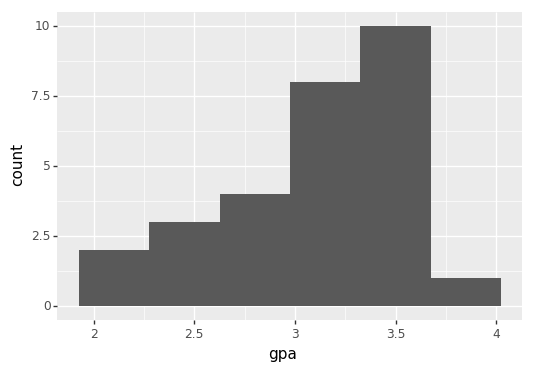

<ggplot: (14629128)>

In [7]:
# Histograma de gpa usando ggplot
p=ggplot(aes(x='gpa'),data=datos1)
p+geom_histogram(binwidth=.35)

Notar que en lugar de 5 intervalos ggplot muestra 10 intervalos

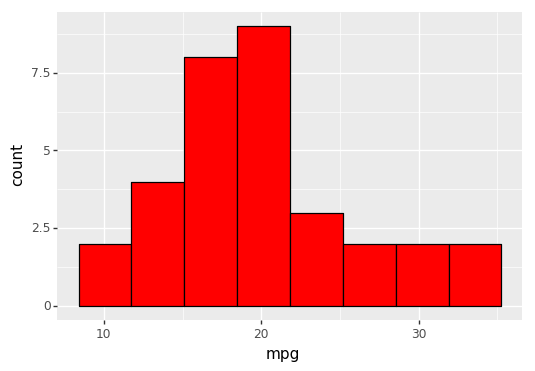

<ggplot: (14596591)>

In [8]:
# Histograma de gpa cpn 8 intervalos usando ggplot
p=ggplot(aes(x = 'mpg'),data=mtcars) 
p=p+geom_histogram(colour = "black" , fill = "red" , bins = 8)
p

Nuevamente notar de que a pesar que se le pide 8 intervalos, ggplot muestra 8 intervalos. La funcion parece estar con errores aun

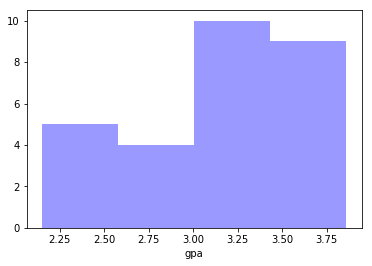

In [9]:
#Histogram de gpa usando seaborn
sns.distplot(datos1['gpa'],kde=False, color="blue")

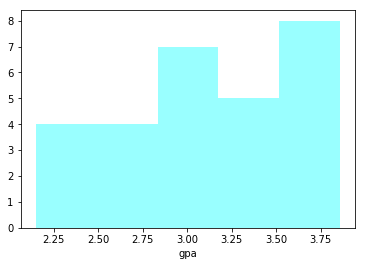

In [10]:
#otra vez el histograma en seaborn usando 5 intervalos
sns.distplot(datos1['gpa'],bins=5, kde=False, color="cyan")

In [11]:
#Histograma usando plotly
import plotly 
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

x = datos1['gpa']
data = [go.Histogram(x=x)]

plotly.offline.iplot(data, filename='histograma en plotly')

Comentario: Me da la impresion de que la libreria mas estable es seaborn.
Lo unico malo es que no hace pie charts

In [12]:
# haciendo un segundo ejemplo con el cojunto de dato mtcars que viene dentro de pandas
mtcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


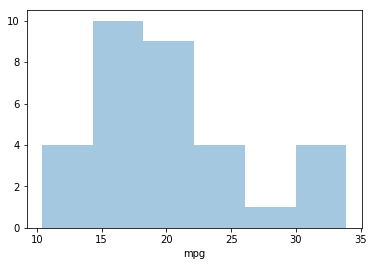

In [13]:
#Haciendo el histograma cpn seaborn
sns.distplot(mtcars['mpg'],kde=False)

C:\Users\edgar2017\Anaconda2\envs\ipykernel_py2\lib\site-packages\plotnine\stats\stat_bin.py:90: UserWarning:

'stat_bin()' using 'bins = 6'. Pick better value with 'binwidth'.



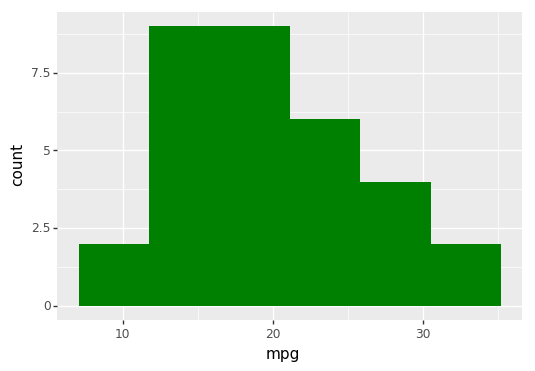

<ggplot: (17436283)>

In [14]:
#Haciendo el histograma con ggplopt
p = ggplot(aes(x='mpg'), data=mtcars)
p+geom_histogram(fill="green")

In [15]:
#haciendo el histograma con Bokeh
from bokeh.charts import Histogram
from bokeh.charts import defaults, show
from bokeh.io import output_notebook

# input options
output_notebook()
hist = Histogram(datos1['gpa'], title="Histograma de GPA")

show(hist)

C:\Users\edgar2017\Anaconda2\envs\ipykernel_py2\lib\site-packages\bokeh\util\deprecation.py:34: BokehDeprecationWarning:


The bokeh.charts API has moved to a separate 'bkcharts' package.

This compatibility shim will remain until Bokeh 1.0 is released.
After that, if you want to use this API you will have to install
the bkcharts package explicitly.




Loading BokehJS ...

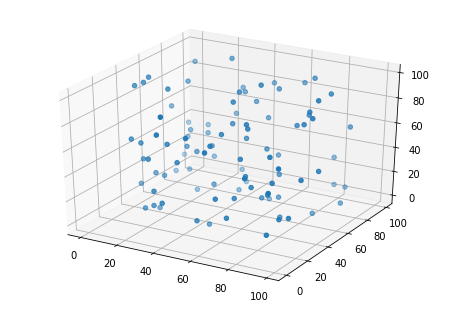

In [16]:
# Scatterplot 2D usando matplotlib
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random


fig = pyplot.figure()
ax = Axes3D(fig)

sequence_containing_x_vals = list(range(0, 100))
sequence_containing_y_vals = list(range(0, 100))
sequence_containing_z_vals = list(range(0, 100))

random.shuffle(sequence_containing_x_vals)
random.shuffle(sequence_containing_y_vals)
random.shuffle(sequence_containing_z_vals)

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
pyplot.show()

In [17]:
import plotly as py
import plotly.graph_objs as go

py.offline.init_notebook_mode(connected=True)
import numpy as np

x, y, z = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 200).transpose()
trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=12,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8
    )
)

x2, y2, z2 = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 200).transpose()
trace2 = go.Scatter3d(
    x=x2,
    y=y2,
    z=z2,
    mode='markers',
    marker=dict(
        color='rgb(127, 127, 127)',
        size=12,
        symbol='circle',
        line=dict(
            color='rgb(204, 204, 204)',
            width=1
        ),
        opacity=0.9
    )
)
data = [trace1, trace2]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='simple-3d-scatter')